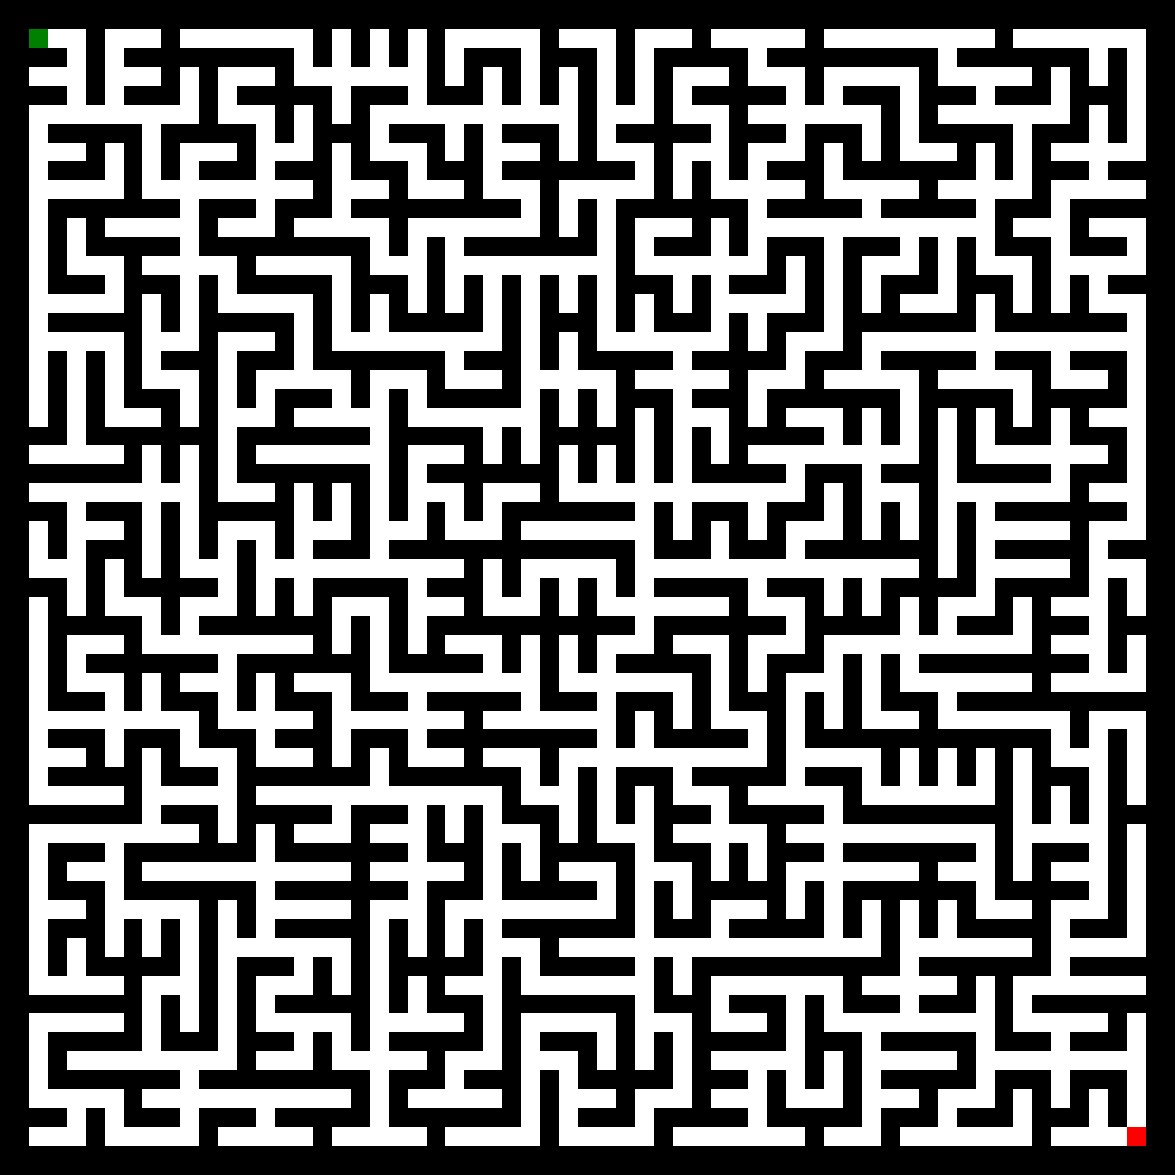

Kích thước mê cung sau khi thêm viền: (61, 61)


In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import re

# 1. Dán toàn bộ nội dung file bạn đã cung cấp vào đây (giữ nguyên các nhãn [source])
raw_content = """
2 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0
0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0
0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0
0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0
0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1
0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0
0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0
1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0
0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0
0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0
0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0
0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1
0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0
0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0
0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1
0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0
0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0
0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0
0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0
0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0
0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0
1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0
0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 9
"""
clean_text = re.sub(r'\]', '', raw_content)

cols = 59
rows = len(numbers) // cols
maze = np.array(numbers[:rows*cols]).reshape(rows, cols)

padded_maze = np.pad(maze, pad_width=1, mode='constant', constant_values=1)

cmap = mcolors.ListedColormap(['white', 'black', 'green', 'red'])
bounds = [0, 0.5, 1.5, 2.5, 10]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# 6. Vẽ và lưu ảnh
plt.figure(figsize=(15, 15), facecolor='black') 
plt.imshow(padded_maze, cmap=cmap, norm=norm, interpolation='nearest')
plt.axis('off')

plt.show()

print(f"Kích thước mê cung sau khi thêm viền: {padded_maze.shape}")